In [13]:
from modules.utils import sorter, cleaner
from modules.preprocess import loader, sample_print
from modules. evaluation import train_plot
from keras import models, layers, optimizers
import matplotlib.pyplot as plt
import numpy as np

In [14]:
[print(cat + " - number of images in directory: " + str(len(os.listdir("data/raw/" + cat)))) for cat in ["pistols","others"]]

pistols - number of images in directory: 7771
others - number of images in directory: 3546


[None, None]

In [15]:
# Use this before pushing to repo
[cleaner(i) for i in ["train","test","validation"]]

[None, None, None]

In [16]:
sorter(2000,1000,1000) 

In [17]:
train = loader("train")

Found 1999 images belonging to 2 classes.


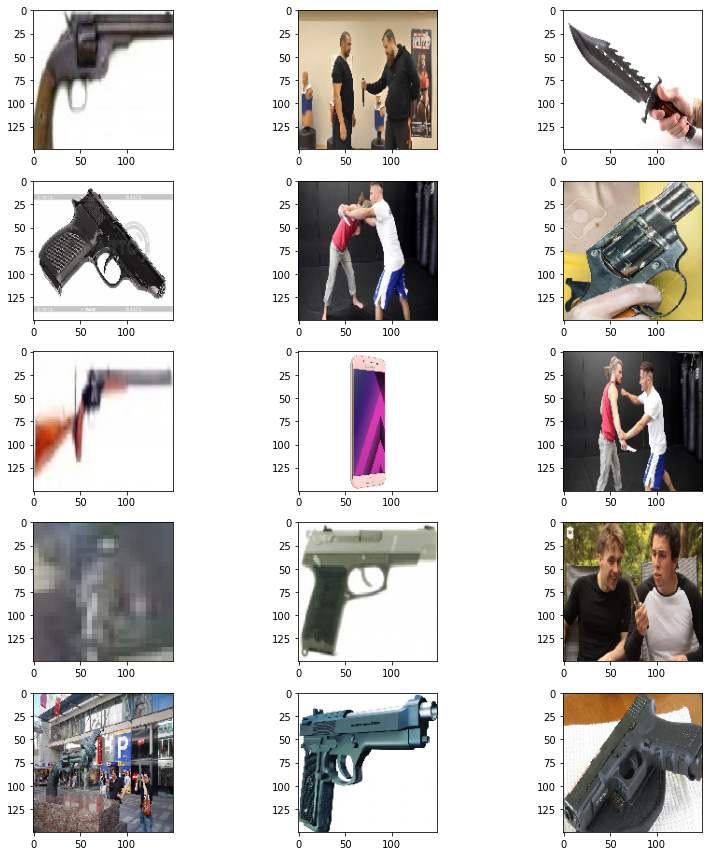

In [18]:
sample_print(train)

In [19]:
val = loader("validation")

Found 1000 images belonging to 2 classes.


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape = (150,150,3)))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [21]:
model.compile(loss="binary_crossentropy",optimizer = optimizers.RMSprop(lr = 1e-4),metrics=["acc"])

In [24]:
history = model.fit(
    train,
    steps_per_epoch=2000//32,
    epochs = 50,
    validation_data = val,
    validation_steps = 1000//32 
)

Epoch 1/50
62/62 [==============================] - 47s 765ms/step - loss: 1.2183 - acc: 0.5587 - val_loss: 0.6487 - val_acc: 0.6431
Epoch 2/50
62/62 [==============================] - 46s 734ms/step - loss: 0.6538 - acc: 0.6609 - val_loss: 0.7429 - val_acc: 0.5867
Epoch 3/50
62/62 [==============================] - 45s 727ms/step - loss: 0.5267 - acc: 0.7295 - val_loss: 0.5336 - val_acc: 0.7238
Epoch 4/50
62/62 [==============================] - 43s 698ms/step - loss: 0.4236 - acc: 0.8033 - val_loss: 0.4797 - val_acc: 0.7611
Epoch 5/50
62/62 [==============================] - 43s 697ms/step - loss: 0.3677 - acc: 0.8495 - val_loss: 0.4502 - val_acc: 0.7883
Epoch 6/50
62/62 [==============================] - 43s 692ms/step - loss: 0.2985 - acc: 0.8836 - val_loss: 0.7099 - val_acc: 0.6643
Epoch 7/50
62/62 [==============================] - 42s 685ms/step - loss: 0.2572 - acc: 0.9090 - val_loss: 0.4149 - val_acc: 0.8135
Epoch 8/50
62/62 [==============================] - 42s 683ms/step - 

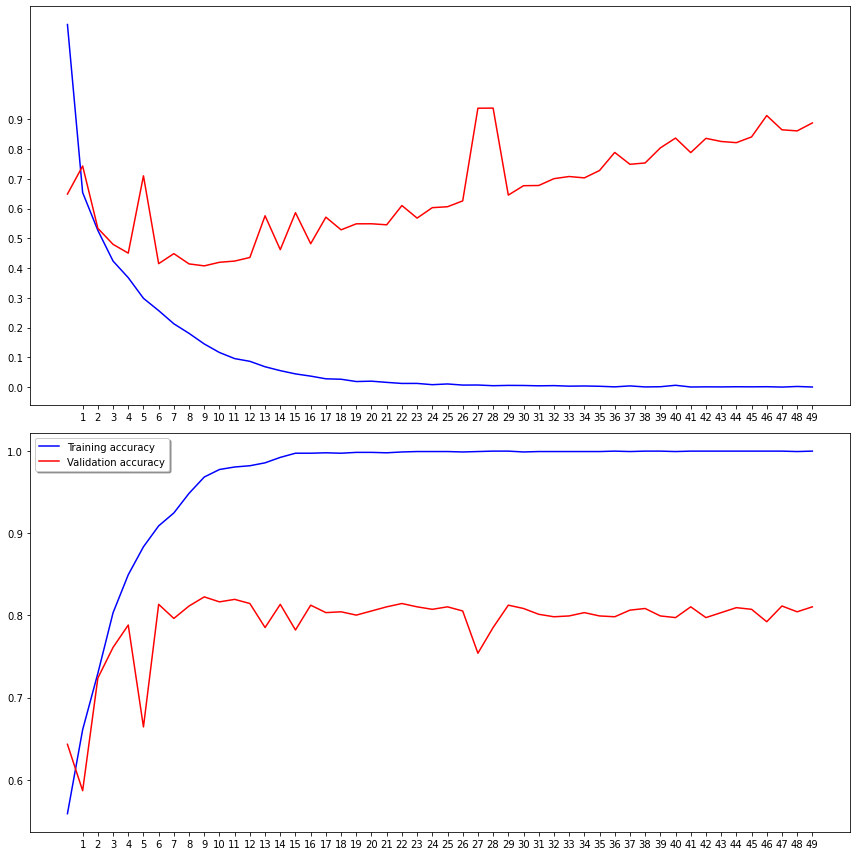

In [25]:
train_plot(history,epochs=50)

In [26]:
[cleaner(i) for i in ["train","test","validation"]]

[None, None, None]